# Project 2

## Setup 

Download the data from the worldbank

In [1]:
# download and update the data in the project
!./setup.sh

mkdir: cannot create directory ‘data’: File exists
--2024-09-25 17:58:08--  https://databank.worldbank.org/data/download/EdStats_CSV.zip
Resolving databank.worldbank.org (databank.worldbank.org)... 104.18.42.231, 172.64.145.25, 2606:4700:4400::6812:2ae7, ...
Connecting to databank.worldbank.org (databank.worldbank.org)|104.18.42.231|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://databankfiles.worldbank.org/public/ddpext_download/EdStats_CSV.zip [following]
--2024-09-25 17:58:08--  https://databankfiles.worldbank.org/public/ddpext_download/EdStats_CSV.zip
Resolving databankfiles.worldbank.org (databankfiles.worldbank.org)... 13.107.246.56, 2620:1ec:bdf::56
Connecting to databankfiles.worldbank.org (databankfiles.worldbank.org)|13.107.246.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38943514 (37M) [application/x-zip-compressed]
Saving to: ‘EdStats_CSV.zip’

EdStats_CSV.zip     100%[===================>]  

Setup the python environment

In [2]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('./data/EdStatsData.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_melted = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name='Year', value_name='Value')
df_melted.describe()
df_melted.info()
df_melted.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58537380 entries, 0 to 58537379
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Country Name    object 
 1   Country Code    object 
 2   Indicator Name  object 
 3   Indicator Code  object 
 4   Year            object 
 5   Value           float64
dtypes: float64(1), object(5)
memory usage: 2.6+ GB


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,1970,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,1970,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,1970,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,1970,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,1970,54.822121


In [6]:
# Convert Year to numeric, dropping any non-year columns
df_melted['Year'] = pd.to_numeric(df_melted['Year'], errors='coerce')
df_melted = df_melted.dropna(subset=['Year'])
df_melted.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,1970.0,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,1970.0,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,1970.0,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,1970.0,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,1970.0,54.822121


In [7]:
# Filter for African countries (you may need to adjust this list)
african_countries = ['Nigeria', 'South Africa', 'Kenya', 'Ethiopia', 'Ghana']  # Add more as needed
df_africa = df_melted[df_melted['Country Name'].isin(african_countries)]

df_africa

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
322520,Ethiopia,ETH,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,1970.0,NaN
322521,Ethiopia,ETH,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,1970.0,NaN
322522,Ethiopia,ETH,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,1970.0,NaN
322523,Ethiopia,ETH,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,1970.0,NaN
322524,Ethiopia,ETH,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,1970.0,NaN
...,...,...,...,...,...,...
57503845,South Africa,ZAF,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,2100.0,NaN
57503846,South Africa,ZAF,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,2100.0,NaN
57503847,South Africa,ZAF,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,2100.0,NaN
57503848,South Africa,ZAF,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,2100.0,NaN


In [8]:
# Focus on a specific indicator, e.g., "number on intake studnet both genders grade 1"
indicator = 'UIS.NERA.2'
enrollment_data = df_africa[(df_africa['Indicator Code'] == indicator) & (df_africa["Value"].isnull() == False) & (df_africa["Year"] <= 2024)]
# # enrollment_data = enrollment_data[]
# enrollment_data = enrollment_data[]

enrollment_data

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
22022985,South Africa,ZAF,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,1994.0,42.219711
26043490,Ethiopia,ETH,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,1999.0,11.286820
26080140,Ghana,GHA,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,1999.0,29.298700
26457635,South Africa,ZAF,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,1999.0,57.509640
26930420,Ethiopia,ETH,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,2000.0,11.777780
26967070,Ghana,GHA,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,2000.0,29.652550
27066025,Kenya,KEN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,2000.0,24.465700
27344565,South Africa,ZAF,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,2000.0,55.606941
27817350,Ethiopia,ETH,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,2001.0,13.570840
27854000,Ghana,GHA,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,2001.0,28.297430


In [9]:
# Basic descriptive statistics
# enrollment_data.groupby('Country Name')['Value'].describe()

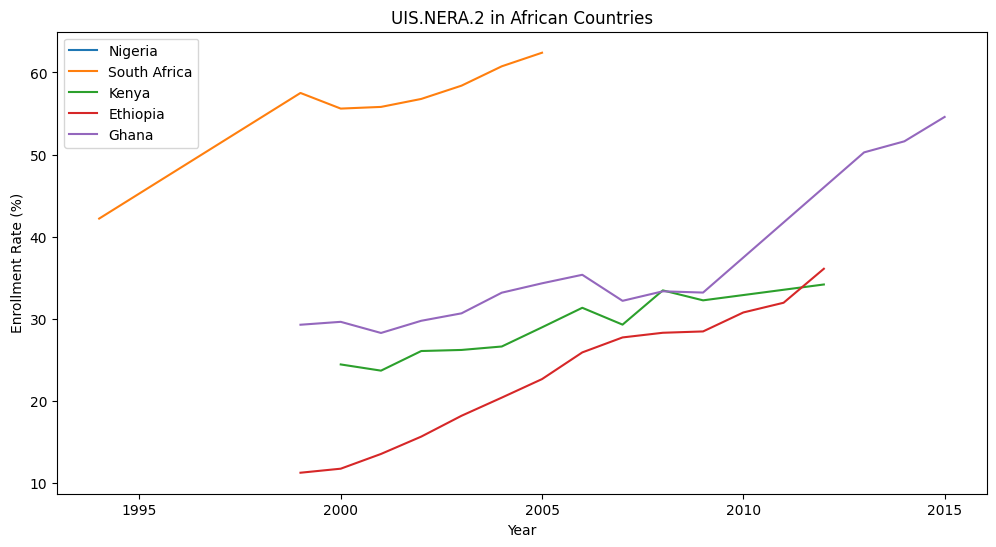

In [10]:
#Visualize the data
plt.figure(figsize=(12, 6))
for country in african_countries:
    country_data = enrollment_data[enrollment_data['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)

plt.title(f'{indicator} in African Countries')
plt.xlabel('Year')
plt.ylabel('Enrollment Rate (%)')
plt.legend()
plt.show()

In [12]:
# Prepare data for ANOVA
recent_year = enrollment_data['Year']
recent_data = enrollment_data[(enrollment_data['Year'] > 2000) & (enrollment_data['Year'] > 2010)]
print(recent_year)

recent_data

22022985    1994.0
26043490    1999.0
26080140    1999.0
26457635    1999.0
26930420    2000.0
26967070    2000.0
27066025    2000.0
27344565    2000.0
27817350    2001.0
27854000    2001.0
27952955    2001.0
28231495    2001.0
28704280    2002.0
28740930    2002.0
28839885    2002.0
29118425    2002.0
29591210    2003.0
29627860    2003.0
29726815    2003.0
30005355    2003.0
30478140    2004.0
30514790    2004.0
30613745    2004.0
30892285    2004.0
31365070    2005.0
31401720    2005.0
31500675    2005.0
31779215    2005.0
32252000    2006.0
32288650    2006.0
32387605    2006.0
33138930    2007.0
33175580    2007.0
33274535    2007.0
34025860    2008.0
34062510    2008.0
34161465    2008.0
34912790    2009.0
34949440    2009.0
35048395    2009.0
35799720    2010.0
36686650    2011.0
37573580    2012.0
37709185    2012.0
38497160    2013.0
39384090    2014.0
40271020    2015.0
Name: Year, dtype: float64


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
36686650,Ethiopia,ETH,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,2011.0,31.975580
37573580,Ethiopia,ETH,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,2012.0,36.112141
37709185,Kenya,KEN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,2012.0,34.198219
38497160,Ghana,GHA,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,2013.0,50.278381
39384090,Ghana,GHA,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,2014.0,51.623199
40271020,Ghana,GHA,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,2015.0,54.591919


In [13]:
# Perform one-way ANOVA
countries = recent_data['Country Name']
values = recent_data['Value']

In [14]:
f_statistic, p_value = stats.f_oneway(*[group['Value'].values for name, group in recent_data.groupby('Country Name')])

In [15]:
print(f"One-way ANOVA results:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

One-way ANOVA results:
F-statistic: 40.14774845031402
p-value: 0.006835174352582162


In [16]:
# Interpret results
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference in enrollment rates among the countries.")
else:
    print("We fail to reject the null hypothesis. There is not enough evidence to conclude a significant difference in enrollment rates.")


We reject the null hypothesis. There is a significant difference in enrollment rates among the countries.
